In [3]:
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Read prepared data sets from file

In [4]:

#readback from file
os.chdir(f"/content/gdrive/MyDrive/Colab_Notebooks/DataSets-UrbanSounds_Classification/")

with open('X_val.pickle' , 'rb') as f:
    X_val = pickle.load(f)

with open('y_val.pickle', 'rb') as f:
    y_val = pickle.load(f)

with open('X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

with open('X_train.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)


print(X_val[0])

[[[1.         1.         1.        ]
  [0.00392157 0.         0.        ]
  [0.01176471 0.         0.        ]
  ...
  [0.01176471 0.         0.        ]
  [0.01176471 0.         0.        ]
  [0.01176471 0.         0.        ]]

 [[1.         1.         1.        ]
  [0.00392157 0.         0.        ]
  [0.01568627 0.         0.        ]
  ...
  [0.01568627 0.         0.        ]
  [0.01568627 0.         0.        ]
  [0.01568627 0.         0.        ]]

 [[1.         1.         1.        ]
  [0.00392157 0.         0.        ]
  [0.01568627 0.         0.        ]
  ...
  [0.01568627 0.         0.        ]
  [0.01568627 0.         0.        ]
  [0.01568627 0.         0.        ]]

 ...

 [[1.         1.         1.        ]
  [0.16862745 0.05882353 0.20392157]
  [0.4627451  0.22745098 0.75294118]
  ...
  [0.49019608 0.2        0.66666667]
  [0.40392157 0.29803922 0.87843137]
  [0.43529412 0.2627451  0.8       ]]

 [[1.         1.         1.        ]
  [0.15294118 0.01960784 0.09019608]


In [5]:
y_val[0]

8

In [6]:
# Create a model object
model = tf.keras.Sequential()

In [7]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding="same",
                                 activation = "relu",
                                 input_shape=(96,128,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [8]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding="same",
                                 activation = "relu",))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding="same",
                                 activation = "relu",))

In [9]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [10]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

In [11]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [12]:
# Compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs = 25,
                    validation_data = (X_val, y_val))

Epoch 1/25
55/55 [==============================] - 19s 103ms/step - loss: 2.1728 - accuracy: 0.1971 - val_loss: 1.7732 - val_accuracy: 0.4032
Epoch 2/25
55/55 [==============================] - 4s 74ms/step - loss: 1.8715 - accuracy: 0.3137 - val_loss: 1.5173 - val_accuracy: 0.4983
Epoch 3/25
55/55 [==============================] - 4s 78ms/step - loss: 1.6821 - accuracy: 0.3946 - val_loss: 1.2698 - val_accuracy: 0.5991
Epoch 4/25
55/55 [==============================] - 4s 73ms/step - loss: 1.5270 - accuracy: 0.4558 - val_loss: 1.1978 - val_accuracy: 0.6460
Epoch 5/25
55/55 [==============================] - 4s 73ms/step - loss: 1.3824 - accuracy: 0.4925 - val_loss: 1.0315 - val_accuracy: 0.6873
Epoch 6/25
55/55 [==============================] - 4s 73ms/step - loss: 1.2887 - accuracy: 0.5291 - val_loss: 0.9457 - val_accuracy: 0.7125
Epoch 7/25
55/55 [==============================] - 4s 73ms/step - loss: 1.1660 - accuracy: 0.5817 - val_loss: 0.8596 - val_accuracy: 0.7468
Epoch 8/25


Visualize the results

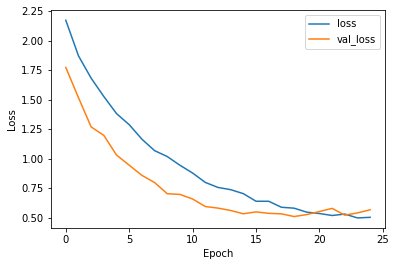

In [14]:
# Plot the the training loss
plt.plot(results.history['loss'], label='loss')

# Plot the the validation loss
plt.plot(results.history['val_loss'], label='val_loss')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Put legend table
plt.legend()

# Show the plot
plt.show()

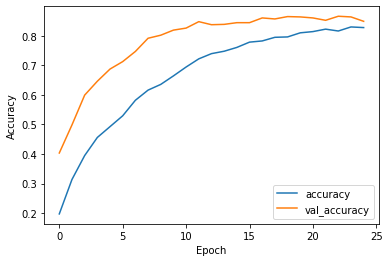

In [15]:
# Plot the the training accuracy
plt.plot(results.history['accuracy'], label='accuracy')

# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label='val_accuracy')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# Put legend table
plt.legend()

# Show the plot
plt.show()

In [16]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 14ms/step - loss: 0.6579 - accuracy: 0.8330


[0.6578524708747864, 0.8329519629478455]

In [17]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[2].reshape(1,96,128,3))

# Print the prediction result
prediction_result

array([[4.7052319e-05, 5.0296939e-10, 4.6223128e-08, 9.1835102e-07,
        4.3259554e-02, 3.3531873e-04, 4.6727633e-10, 9.5635676e-01,
        5.2213281e-08, 2.9640140e-07]], dtype=float32)

In [18]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [19]:
# Print the results
print(f'this image belongs to class {predicted_class} with {predicted_probability} probability % ')

this image belongs to class 7 with 0.9563567638397217 probability % 
